In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from skimage import io
from skimage.color import *
import cv2
from my_commonfunctions import *

matplotlib.rcParams['figure.dpi'] = 200

/Users/mac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  """Entry point for launching an IPython kernel.
/Users/mac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  


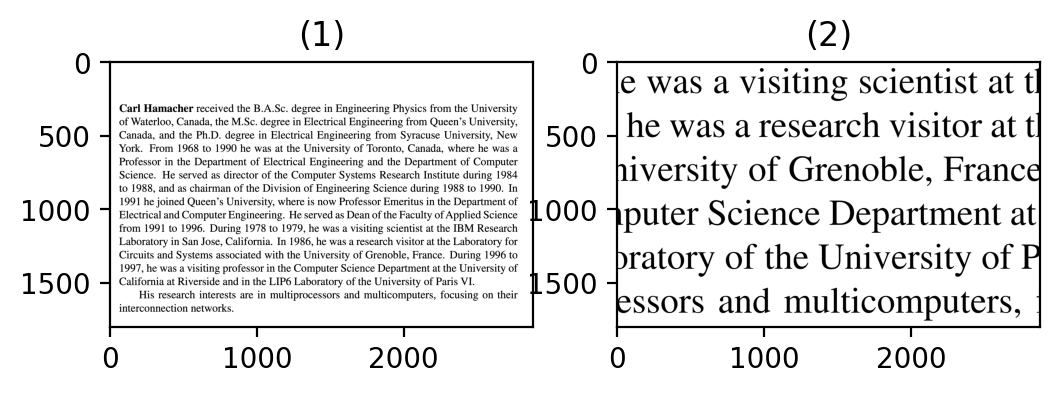

In [15]:
low_ppi = (rgb2gray(io.imread('metric_testing_low_ppi.png')) * 255).astype(np.uint8)
high_ppi = (rgb2gray(io.imread('metric_testing_high_ppi.png')) * 255).astype(np.uint8)
my_show_images([low_ppi, high_ppi], row_max=2)

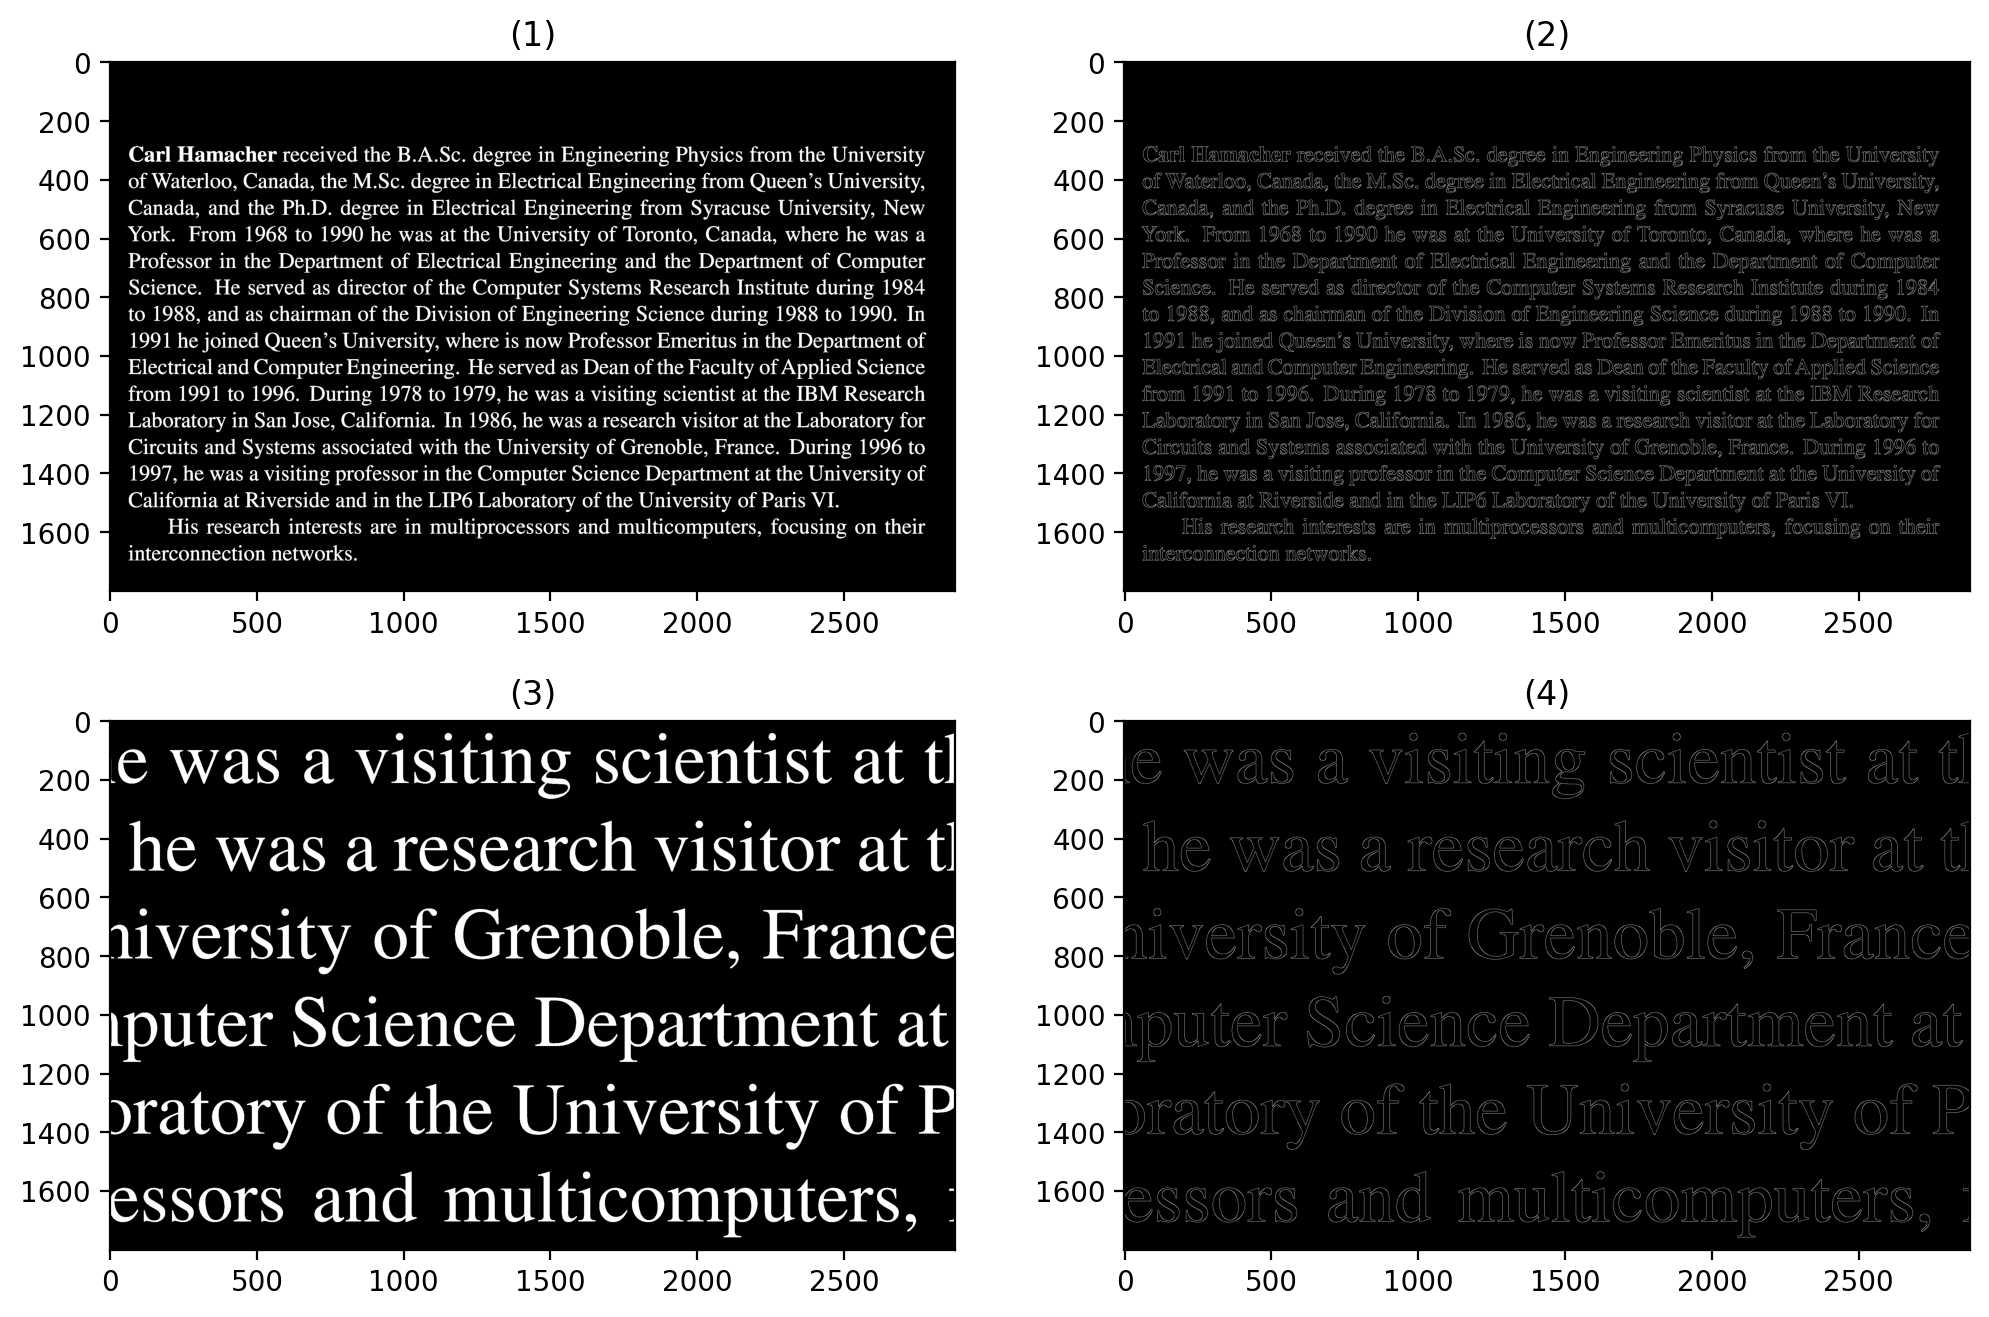

In [16]:
low_ppi_bin = low_ppi < 150
high_ppi_bin = high_ppi < 150

low_ppi_canny = cv2.Canny(low_ppi, 100, 200)
high_ppi_canny = cv2.Canny(high_ppi, 100, 200)

my_show_images([low_ppi_bin, low_ppi_canny, high_ppi_bin, high_ppi_canny], row_max=2)

In [19]:
def metric(img_gray_uint8, thresh, greater_or_less):
    binary = img_gray_uint8 > thresh if greater_or_less == 'greater' else img_gray_uint8 < thresh
    canny = cv2.Canny(img_gray_uint8, 100, 200) > 200
    binary_sum = np.sum(binary)
    canny_sum = np.sum(canny)
    return binary_sum/canny_sum

In [20]:
metric(low_ppi, 150, 'less')

2.565269185118843

In [21]:
metric(high_ppi, 150, 'less')

6.846351495455238

In [25]:
width = low_ppi.shape[1]
height = low_ppi.shape[0]
low_ppi_smaller = cv2.resize(low_ppi, (width//2, height//2))
high_ppi_smaller = cv2.resize(high_ppi, (width//2, height//2))

In [26]:
metric(low_ppi_smaller, 150, 'less')

1.4197071831913137

In [27]:
metric(high_ppi_smaller, 150, 'less')

3.4831239625386807